<h1><center> 社会网络分析-课堂练习 </center></h1>

**NetworkX**: Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

Installation: 
`$ pip install networkx`

Version check in Python:
`networkx.__version__`

Upgrade:
`$ pip install networkx --upgrade`

**nxviz**: network visualization package

Installation:
`$ pip install nxviz`

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from collections import Counter

%matplotlib inline

**Some open source network data locations:**

* **graph examples embedded in NetworkX:**
    * Zachary's Karate Club: `nx.karate_club_graph()`
    * Davis Southern women social network: `nx.davis_southern_women_graph()`
    *  Florentine families: `nx.florentine_families_graph()`
    * more examples: https://networkx.github.io/documentation/networkx-1.9/examples/index.html
* **The Koblenz Network Collection**: http://konect.uni-koblenz.de/
* **Stanford Large Network Dataset Collection**: https://snap.stanford.edu/data/


**To learn the basics of Network Science: http://networksciencebook.com/**


## I. Networks Basics

### 1. Create & Manipulate Networks 

Let's start with simple undirected and unweighted networks. An example of such networks, where we don't have edge direction (in/out) or edge weight (indicating how strong a connection is), would be the Facebook network. If you are a friend of mine, I am a friend of yours, and the edge connecting us is either 1 (connected) or non-existent (not connected). We will generate more complex networks later on.

**Nodes**: can represent anything (images, webpage URL links, people, power stations, numbers, words, etc.)

**Edges**: represent relationships between nodes

In [2]:
# create empty network
G = nx.Graph()

In [3]:
# add one node with label '1'
G.add_node(1)

In [4]:
# add nodes from a list of elements
G.add_nodes_from(['Mary', 4, 'Alice', 'Mary'])

In [5]:
# remove node
G.remove_node('Mary')

In [6]:
# remove multiple nodes
G.remove_nodes_from(['Mary', 1])

In [7]:
# view nodes in network G
G.nodes

NodeView((4, 'Alice'))

In [8]:
# add single edge - tuple of nodes (source, target)
# this also adds nodes if they don't already exist
G.add_edge('Mary','Steven')

In [9]:
# add multiple of edges (list of tuples)
G.add_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [10]:
# view edges in network G
G.edges

EdgeView([('Alice', 'Mary'), ('Mary', 'Steven')])

In [11]:
# remove edge
G.remove_edge('Mary','Alice')

In [12]:
# remove multiple edges (list of tuples)
G.remove_edges_from([('Mary', 'Steven') , ('Mary', 'Alice')])

In [13]:
# get number of nodes in network G
G.number_of_nodes()

4

In [14]:
# get number of edges in network G
G.number_of_edges()

0

In [15]:
# get Alice's number of neighbors (connections)
G.degree('Alice')

0

In [16]:
# empty the network
G.clear()

**Load network from file.** You can read/write a graph in a file using common graph formats (edge lists, adjacency lists, GML, GraphML, pickle, LEDA, etc.).

To see how to read different types of adjancency formats, check here: https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.html

In [17]:
# input edgelist from file
G = nx.read_edgelist("../datafiles/social/facebook/fb.txt")

In [18]:
# output edgelist to file
nx.write_edgelist(G,'fb.edgelist')

In [19]:
# get the 2nd node's neighbors (retrieves a dictionary)
dict_neighbors = G.neighbors('2')

In [20]:
list(dict_neighbors)

['1',
 '3',
 '7',
 '9',
 '11',
 '12',
 '16',
 '17',
 '18',
 '23',
 '51',
 '53',
 '479',
 '1079',
 '1132',
 '1237',
 '1645',
 '2053',
 '2054',
 '2055',
 '2056',
 '2057',
 '2058',
 '2059',
 '2060',
 '2061']

In [21]:
# number of total nodes in graph
len(G.nodes)

63731

In [22]:
# number of total edges in graph
len(G.edges)

817035

In [23]:
G.clear()

### 2. Network Types 

#### a. Weighted Graphs

**Edge weight.** Consider that the edge that you are adding should contain additional information, such as the strength of the connection. This would be important, for example, when analyzing communication networks to check friendship/connectivity strength. You want to capture how many times they exchanged e-mails, calls, text messages, to indicate the strength of the connection. For this you will assign weights to the edge, values that can be the number of communications, or the fraction of communications, normalized.

In [24]:
# assign weight to edge
G.add_edge('Mary','Steven', weight=5)

In [25]:
G.edges

EdgeView([('Mary', 'Steven')])

In [26]:
# access edge properties
G['Mary']['Steven']

{'weight': 5}

In [27]:
# change edge weight
G['Mary']['Steven']['weight'] = 1

#### b. Directed Graphs

**Edge direction.** Edges have direction describing source -> target node relationship.

In [28]:
#undirected
G.nodes

NodeView(('Mary', 'Steven'))

In [29]:
dg = nx.DiGraph()

In [30]:
# you can create an undirected representation of network G
nx.to_undirected(G)

In [31]:
# you can create a directed representation of network G
dg = nx.to_directed(G)

In [32]:
dg.edges

OutEdgeView([('Mary', 'Steven'), ('Steven', 'Mary')])

#### c. Multigraphs

Many algorithms are not well defined on such graphs. Therefore, you should convert such graphs rather to a standard graph in a way that makes the measurement well defined.

In [33]:
# multigraphs can store multiple edges information between same two nodes that can have different properties
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 3.0), (1, 2, 75), (2, 3, 5), (1, 2, 4.2)])

In [34]:
# lists the edges (node1, node2, edge_index), including the multiedges, adding the multiedge index as 3rd element in edge tuple
MG.edges

MultiEdgeView([(1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 3, 0)])

In [35]:
# lists the edges (node1, node2, weight/edge_attribute), the 3rd element is the weights of the edges
MG.edges.data('weight')

MultiEdgeDataView([(1, 2, 3.0), (1, 2, 75), (1, 2, 4.2), (2, 3, 5)])

In [36]:
MG.edges.data()

MultiEdgeDataView([(1, 2, {'weight': 3.0}), (1, 2, {'weight': 75}), (1, 2, {'weight': 4.2}), (2, 3, {'weight': 5})])

In [37]:
# check the weight of an edge
MG[1][2]

AtlasView({0: {'weight': 3.0}, 1: {'weight': 75}, 2: {'weight': 4.2}})

## II. Analysis of Structural Properties

#### 1. Node degree, network average degree, degree distribution

In [38]:
degrees = [deg for node, deg in nx.degree(G)]

In [39]:
# kmin - minimum degree
kmin = np.min(degrees)

# kmax - maximum degree
kmax = np.max(degrees)

# kavg - average degree of the network
kavg = np.mean(degrees)

**Degree distribution**: helps us understand connectivity trends in networks and how edges are distributed among nodes (does everyone have similar number of connections, or do we have hubs, nodes with significantly higher number of connections?)

In [40]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

#### 2. Paths on Networks: average path length, shortest path, longest path

In [41]:
# find shortest path between node1 and node2 in directed & undirected networks 
nx.shortest_path(G, 'Mary', 'Steven')
#nx.shortest_path(G, node1, node2, weighted=True)

['Mary', 'Steven']

In [42]:
# average path length in graph
nx.average_shortest_path_length(G, weight=None)

1.0

#### 3. Clustering coefficient, triangles

In [43]:
# triangles
nx.triangles(G)

{'Mary': 0, 'Steven': 0}

In [44]:
# clustering coefficient of a node
nx.clustering(G, 'Mary')

0

In [45]:
# clustering coefficient of all nodes (returns a dictionary)
nx.clustering(G)

{'Mary': 0, 'Steven': 0}

In [46]:
# clustering coefficient of the network
cc = nx.clustering(G)
avg_clust = sum(cc.values()) / len(cc)
print(avg_clust)

0.0


#### 4. Centrality measures

In [47]:
# degree centrality
nx.degree_centrality(G)

{'Mary': 1.0, 'Steven': 1.0}

In [48]:
# betweenness centrality of network
nx.betweenness_centrality(G)

{'Mary': 0.0, 'Steven': 0.0}

In [49]:
# closeness centrality of network
nx.closeness_centrality(G)

{'Mary': 1.0, 'Steven': 1.0}

## III. Network Visualization

What you've all been waiting for! :)

Disclaimer: visualizations can be pretty and insightful, however for large networks they tend to be just pretty! Knowing how to compute network measures is the key!

* visualization with NetworkX: *"NetworkX provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package."*
* nxviz
* Matplotlib or Graphviz with pydot (import and export NetworkX graphs in Graphviz dot format using pydot)
* Gephi
* Graphviz
* Neo4j
* D3
* etc.

Basic drawing methods in NetworkX module: 
* `nx.draw()`
* `nx.random()`
* `nx.draw_spectral()`
* `nx.draw_circular()`

In [50]:
# let's create a scale-free network
G = nx.barabasi_albert_graph(50, 3)

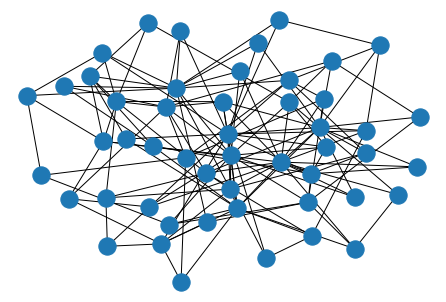

In [51]:
# simplest way to draw a graph
nx.draw(G)

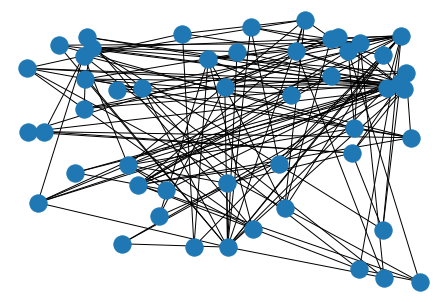

In [52]:
# draw a graph with random layout
nx.draw_random(G)

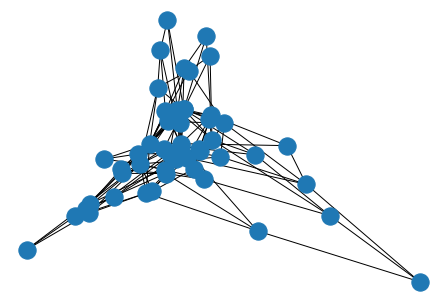

In [53]:
# draw a graph with spectral layout
nx.draw_spectral(G)

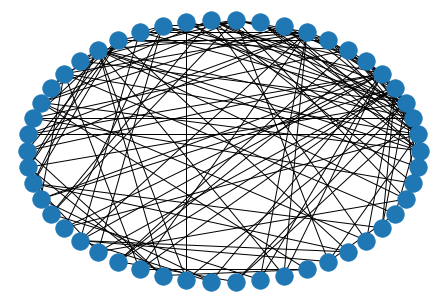

In [54]:
# draw a graph with circular layout
nx.draw_circular(G)

In [55]:
# nxviz package provides some nice visualization options
import nxviz as nv

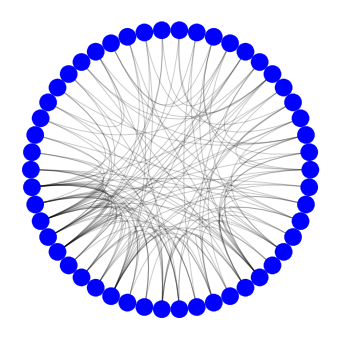

In [57]:
# circle plots
c = nv.CircosPlot(G) 
c.draw()

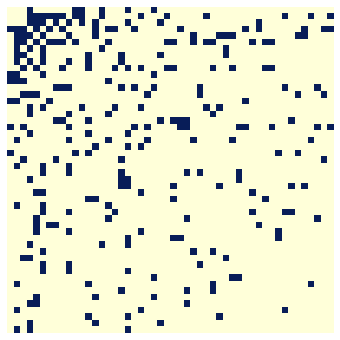

In [58]:
# matrix plot
nv.MatrixPlot(G).draw()

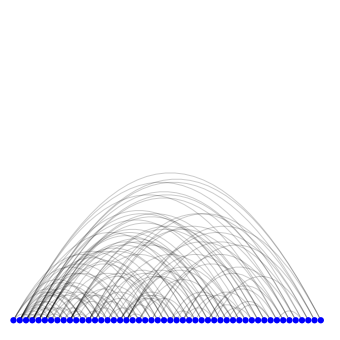

In [59]:
# arc plot
nv.ArcPlot(G).draw()

## IV. Case Studies - Real Network Analysis from Data 

### IV. 1. Social Networks - Facebook Pages
using ***Graph Embedding with Self Clustering: Facebook data*** 

- data location: SNAP (Stanford Large Network Dataset Collection)
- source: B. Rozemberczki, R. Davies, R. Sarkar and C. Sutton. GEMSEC: Graph Embedding with Self Clustering. 2018.

<img src="../images/data.png" alt="Data" style="width: 300px;"/>

* nodes: pages
* edges: mutual likes among them -> this means undirected & networks


There are 8 different networks representing different categories. For our current analysis, we will analyze and compare 4 networks `Company`, `Artist`, `Politician` and `Public Figure`, however, you can play with all of them to get used to manipulating networks and computing structural property measures, and to gain insights about the data.

### a. Load network from file

In [63]:
# load edgelists from data file
co_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/company_edges.csv", delimiter=',')
art_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/artist_edges.csv", delimiter=',')
poli_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/politician_edges.csv", delimiter=',')
pub_net = nx.read_edgelist("../datafiles/social/facebook/facebook_clean_data/public_figure_edges.csv", delimiter=',')

### b. Analyze network

In [64]:
# check number of nodes and edges 
N = len(poli_net.nodes)
print(N)

E = len(poli_net.edges)
print(E)

5908
41729


Let's see what is on average the number of mutual 'Likes' (connections) each page (node) has. 

In [65]:
# calculate average degree of politician pages
degrees = [deg for node, deg in nx.degree(poli_net)]
kavg = np.mean(degrees)
print("The # of mutual likes politician pages have on average:", kavg)

# calculate average degree of artist pages
degrees = [deg for node, deg in nx.degree(art_net)]
kavg = np.mean(degrees)
print("The # of mutual likes artist pages have on average:", kavg)

# calculate average degree of company pages
degrees = [deg for node, deg in nx.degree(co_net)]
kavg = np.mean(degrees)
print("The # of mutual likes company pages have on average:", kavg)

# calculate average degree of public figure pages
degrees = [deg for node, deg in nx.degree(pub_net)]
kavg = np.mean(degrees)
print("The # of mutual likes public figure pages have on average:", kavg)

The # of mutual likes politician pages have on average: 14.126269465132024
The # of mutual likes artist pages have on average: 32.43812728892408
The # of mutual likes company pages have on average: 7.413023453553461
The # of mutual likes public figure pages have on average: 11.606398616515348


What about the degree distribution in the networks?

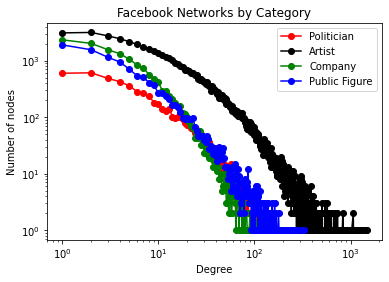

In [66]:
hist_poli = degree_distr(poli_net)
hist_art = degree_distr(art_net)
hist_co = degree_distr(co_net)
hist_pub = degree_distr(pub_net)

plt.figure()
plt.loglog(hist_poli.T[0],hist_poli.T[1],'ro-')
plt.loglog(hist_art.T[0],hist_art.T[1],'ko-')
plt.loglog(hist_co.T[0],hist_co.T[1],'go-')
plt.loglog(hist_pub.T[0],hist_pub.T[1],'bo-')
plt.legend(['Politician', 'Artist', 'Company', 'Public Figure'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Facebook Networks by Category')
plt.savefig('fb_network_degree_distr.png')

In [67]:
# check clustering coefficient
cc = nx.clustering(poli_net)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Politician network clustering coefficient:", avg_cc_poli)

cc = nx.clustering(art_net)
avg_cc_art = sum(cc.values()) / len(cc)
print("Artist network clustering coefficient:", avg_cc_art)

cc = nx.clustering(co_net)
avg_cc_co = sum(cc.values()) / len(cc)
print("Company network clustering coefficient:", avg_cc_co)

cc = nx.clustering(pub_net)
avg_cc_pub = sum(cc.values()) / len(cc)
print("Public figure network clustering coefficient:", avg_cc_pub)

Politician network clustering coefficient: 0.385096125793274
Artist network clustering coefficient: 0.13812042114553588
Company network clustering coefficient: 0.2392418380399809
Public figure network clustering coefficient: 0.17934725117824554


### c. Visualize network

**Homework:** Try out multiple visualizations, and decide which visualization method creates an informative plot for the network.

### d. Takeaways

* politician network has highest clustering coefficient (CC = 0.39) -> political views tend to cluster people more densely
* lowest average degree found in company network
* highest average degree seen in artist network
* each network has similar degree distribution with heavy tail -> most nodes have small number of connections, while a few nodes (hubs) have significantly higher number of links
* and many more insights with more detailed analyses -> it is your homework to explore more! :)

### V. 1. Social Networks - Physicians 

In [68]:
# load physicians network
G_phys = nx.read_edgelist("../datafiles/social/physicians/out.moreno_innovation_innovation", comments='%')

In [69]:
len(G_phys.nodes)

241

In [70]:
len(G_phys.edges)

923

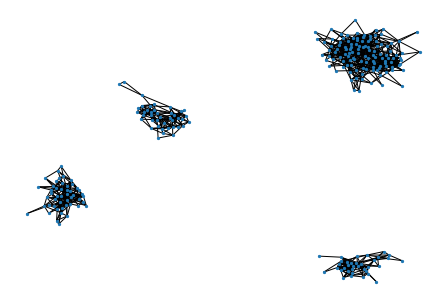

In [71]:
nx.draw(G_phys, node_size=5)

In [72]:
nx.is_connected(G_phys)

False

In [73]:
cc = nx.clustering(G_phys)
avg_cc_poli = sum(cc.values()) / len(cc)
print("Physicians network clustering coefficient:", avg_cc_poli)

Physicians network clustering coefficient: 0.31157513564640726


In [74]:
hist_pub = degree_distr(G_phys)

Text(0.5, 1.0, 'Physicians')

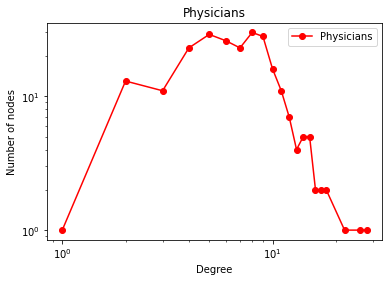

In [75]:
plt.figure()
plt.loglog(hist_pub.T[0],hist_pub.T[1],'ro-')
plt.legend(['Physicians'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Physicians')

### V. 2. Infrastructure Networks

In [76]:
G_infra = nx.read_edgelist("../datafiles/infrastructure/powergrid/out.opsahl-powergrid", comments='%')

In [ ]:
# Please do more exercises! The same for below.

### V. 3. Technological Networks

In [77]:
G_tech = nx.read_edgelist("../datafiles/technological/p2p/p2p-Gnutella08.txt")

### V. 4. Biological Networks

In [78]:
G_bio = nx.read_edgelist("../datafiles/biological/protein/out.moreno_propro_propro", comments='%')

### V. 5. Lexical Networks

How to import node attributes located in a separate file.

In [79]:
G_lex = nx.read_edgelist("../datafiles/lexical/david_copperfield/out.adjnoun_adjacency_adjacency", comments='%')

Nodes are listed as numbers, but when visualizing our network, we would like to see the words that represent those nodes. The words are stored in a separate file, in `ent.adjnoun_adjacency_adjacency.word.name`, and the index of the word corresponds to the index of the node. 

In [80]:
# load node name data for each node in the network
with open("../datafiles/lexical/david_copperfield/ent.adjnoun_adjacency_adjacency.word.name") as file:
    node_name = {}
    i = 1 
    for line in file:
        node_name[str(i)] = line.strip()
        i += 1

In [81]:
# assign the name of the node to the node in the graph
nx.set_node_attributes(G_lex, node_name, 'name')

In [82]:
nx.get_node_attributes(G_lex, 'name')

{'1': 'man',
 '2': 'agreeable',
 '3': 'old',
 '9': 'first',
 '14': 'black',
 '18': 'little',
 '19': 'young',
 '20': 'best',
 '29': 'better',
 '42': 'certain',
 '46': 'happy',
 '47': 'common',
 '52': 'good',
 '92': 'alone',
 '103': 'poor',
 '4': 'person',
 '12': 'air',
 '22': 'friend',
 '23': 'love',
 '24': 'part',
 '25': 'room',
 '26': 'thing',
 '27': 'time',
 '28': 'way',
 '32': 'place',
 '35': 'woman',
 '37': 'door',
 '43': 'day',
 '51': 'dear',
 '55': 'pretty',
 '67': 'head',
 '74': 'life',
 '84': 'house',
 '94': 'miserable',
 '98': 'name',
 '99': 'pleasant',
 '105': 'same',
 '106': 'strong',
 '112': 'year',
 '11': 'bad',
 '44': 'other',
 '86': 'money',
 '5': 'short',
 '6': 'anything',
 '7': 'arm',
 '33': 'right',
 '40': 'evening',
 '90': 'thought',
 '8': 'round',
 '53': 'home',
 '56': 'open',
 '16': 'face',
 '38': 'eye',
 '39': 'bright',
 '71': 'hand',
 '76': 'large',
 '88': 'small',
 '107': 'something',
 '10': 'aunt',
 '13': 'boy',
 '41': 'morning',
 '60': 'great',
 '61': 'master'

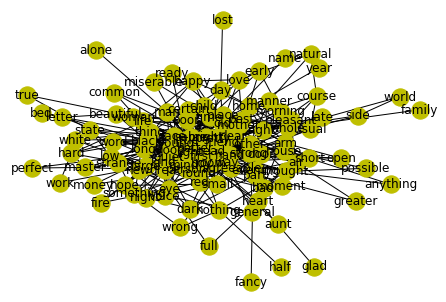

In [83]:
nx.draw(G_lex, labels=node_name, node_color='y')